**<p style = "text-align: center">TR∆Ø·ªúNG ƒê·∫†I H·ªåC KHOA H·ªåC T·ª∞ NHI√äN - ƒê·∫†I H·ªåC QU·ªêC GIA TPHCM</p>**

# **<p style = "text-align: center">NH·∫¨P M√îN KHOA H·ªåC D·ªÆ LI·ªÜU</p>**
## **<p style = "text-align: center">ƒê·ªì √°n Cu·ªëi k√¨</p>**
## **<p style = "text-align: center">TR·∫¢ L·ªúI C√ÇU H·ªéI</p>**

### <p style = "text-align: center"> <b>ƒê·ªÅ t√†i:</b> Ph√¢n t√≠ch, kh√°m ph√° d·ªØ li·ªáu v·ªÅ s√°ch tr√™n web th∆∞∆°ng m·∫°i ƒëi·ªán t·ª≠ (tiki)</p>
**Sinh vi√™n th·ª±c hi·ªán**

| M√£ s·ªë sinh vi√™n | H·ªç v√† t√™n |
| --- | --- |
| 20120040 | Nguy·ªÖn Quang Gia B·∫£o |
| 20120136 | Hu·ª≥nh Tu·∫•n Nam |
| 20120158 | Tr·∫ßn Ho√†ng Anh Phi |

---

### C√†i ƒë·∫∑t th∆∞ vi·ªán khai b√°o

In [3]:
# !pip install fuzzywuzzy
# !pip install python-Levenshtein

### Khai b√°o th∆∞ vi·ªán s·ª≠ d·ª•ng

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Dataset/features/processed.csv')

/var/folders/gg/4_1r0r1n6nn2sslng47v_j180000gn/T/ipykernel_55139/434346435.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Dataset/features/processed.csv')


---

## **Tr·∫£ l·ªùi c√¢u h·ªèi**

### **C√¢u 1: T·∫°i sao c√≥ nh·ªØng quy·ªÉn s√°ch tr√πng t√™n ?**
- ·ªû m·ªói th·ªÉ lo·∫°i s√°ch c√≥ r·∫•t nhi·ªÅu s√°ch kh√°c nhau. C√≥ nhi·ªÅu s√°ch c√πng t√™n v·ªõi nhau hay kh√¥ng? T·∫°i sao l·∫°i nh∆∞ v·∫≠y?
<br>

**Tr·∫£ l·ªùi c√¢u h·ªèi th√†nh c√¥ng** <br>
N·∫øu tr·∫£ l·ªùi ƒë∆∞·ª£c c√¢u h·ªèi b·∫°n s·∫Ω hi·ªÉu t·∫°i sao trong b·ªô d·ªØ li·ªáu l·∫°i c√≥ nhi·ªÅu s√°ch c√≥ c√πng t√™n (N·∫øu c√≥)<br>

<font color = red>Kh√≥ khƒÉn </font>: 
+ T√™n c·ªßa nh·ªØng quy·ªÉn s√°ch l·∫°i ƒë∆∞·ª£c ƒë·∫∑t kh√°c nhau. ·∫¢nh h∆∞·ªüng ƒë·∫øn qu√° tr√¨nh gom nh√≥m. C·∫ßn x·ª≠ l√≠ v·∫•n ƒë·ªÅ kh√≥ n√†y cho m·ªôt b·ªô d·ªØ li·ªáu g·∫ßn 40 ng√†n d·ªØ li·ªáu.<br>
+ Kh√¥ng c√≥ c√°c y·∫øu t·ªë ƒë·ªÉ ph√¢n bi·ªát t√™n c·ªßa s√°ch.<br>

<font color = red>H∆∞·ªõng gi·∫£i quy·∫øt </font>: 
+ Thay v√¨ x·ª≠ l√≠ m·ªôt l√∫c 40 ng√†n d·ªØ li·ªáu, ta s·∫Ω s·ª≠ d·ª•ng c·ªôt `categories` ƒë·ªÉ ph√¢n lo·∫°i th√†nh t·ª´ng lo·∫°i s√°ch, r·ªìi ti·∫øp t·ª•c ph√¢n lo·∫°i theo t√™n.
+ Ta s·ª≠ d·ª•ng `Ratio Matching` - ƒê·ªô t∆∞∆°ng th√≠ch c·ªßa 2 string, ƒë·ªÉ ph√°n ƒëo√°n series c·ªßa cu·ªën truy·ªán.


D√πng th·ª≠ vi·ªán `fuzzywuzzy` ƒë·ªÉ t√¨m m·ª©c ƒë·ªô t∆∞∆°ng th√≠ch, l·ªçc ra c√°c nh√≥m c√≥ m·ª©c ƒë·ªô t∆∞∆°ng th√≠ch cao.

In [6]:
# !pip install fuzzywuzzy
from fuzzywuzzy import fuzz, process

##### Vi·∫øt c√°c h√†m x·ª≠ l√≠ 

 - H√†m l·∫•y c√°c d√≤ng thu·ªôc `categories` m√† ta y√™u c·∫ßu.

In [7]:
def get_df_by_categories(categories):
    categories_book_df = df[df.categories == categories]
    return categories_book_df

- S·ª≠ d·ª•ng Data Frame m√† ta v·ª´a l·∫•y ƒë∆∞·ª£c t·ª´ `categories` m√† ta ch·ªçn, ti·∫øn h√†nh ph√¢n theo m·ª©c ƒë·ªô t∆∞∆°ng th√≠ch c·ªßa c√°c t√™n v·ªõi nhau.


V√≠ d·ª• s·ª≠ d·ª•ng fuzzywuzzy ƒë·ªÉ ƒë√°nh gi√° m·ª©c t∆∞∆°ng th√≠ch:

In [8]:
# Ta c√≥ 2 string:
a = "Xin C·∫£m ∆°n"
b = "Xin Ch√†o"

fuzz.ratio(a,b) # ƒê·ªô gi·ªëng nhau l√† 48%
# ƒê·ªô t∆∞∆°ng th√≠ch n√†y ƒë∆∞·ª£c x√©t theo c√°c y·∫øu t·ªë nh∆∞:
# S·ªë l∆∞·ª£ng t·ª´ ·ªü trong hai c√¢u
# V·ªã tr√≠ t·ª´
# Ki·ªÉu vi·∫øt c·ªßa ch·ªØ (hoa ho·∫∑c th∆∞·ªùng)
# .....

56

In [9]:
a = "Xin C·∫£m ∆°n"
b = "Xin Ch√†o"

fuzz.partial_ratio(a ,b) # c√≥ bao nhi√™u % c·ªßa a trong b ho·∫∑c b trong a, d√π ƒë·ªïi v·ªã tr√≠ c√°c parameter c≈©ng kh√¥ng l√†m thay ƒë·ªïi gi√° tr·ªã %.
# ·ªû c√¢u n√†y do v·ªã tr√≠ c·ªßa t·ª´ Xin C

62

- Vi·∫øt h√†m ph√¢n nh√≥m theo series c·ªßa c√°c s√°ch trong 1 categories.<br>
<br>

<font color = red>C√°ch l√†m </font>:<br>
- Ta s·∫Ω ki·ªÉm tra c√≥ 1 `list` ƒë·ªÉ ch·ª©a c√°c series v√† s·∫Ω d√πng `list` n√†y ƒë·ªÉ ƒëi so s√°nh v·ªõi t√™n c·ªßa c√°c cu·ªën s√°ch kh√°c.
- So s√°nh cu·ªën s√°ch v·ªõi t·ª´ng series b√™n trong list. N·∫øu ƒë·ªô t∆∞∆°ng th√≠ch d∆∞·ªõi 80% s·∫Ω add t√™n ƒë√≥ v√†o series. Ng∆∞·ª£c l·∫°i ta s·∫Ω th√™m v√†o th√¨ ta kh√¥ng th√™m v√†o.
- V·ªõi m·ªói series trong list s·∫Ω ƒë∆∞·ª£c ƒë√°nh d·∫•u 1 index, ta g·ªçi h√†m index c·ªßa list ƒë·ªÉ l·∫•y index ƒë√≥ v√† g√°n cho d√≤ng c·ªßa cu·ªën s√°ch ƒë√≥.<br>

<font color = red>H√†m tr·∫£ v·ªÅ</font>: H√†m tr·∫£ v·ªÅ list l√† index c·ªßa series m√† cu·ªën s√°ch thu·ªôc v·ªÅ

In [10]:
# ulen_names = lightnovel_df.name.nunique() # number of unique names
# u_names = list(map(lambda x: x.upper(), lightnovel_df.name.unique())) #array unique names


# ln_series = []
# series_Series = []
# ln_series.append(u_names[0])
# for name in u_names:
#     ratio_series = []
#     for series in ln_series:
#         ratio_series.append(SequenceMatcher(None, series, name).ratio())
#     max_ratio = max(ratio_series)
#     if max_ratio < 0.6:
#         ln_series.append(name)
#         series_Series.append(ln_series.index(name))
#     else:
#         series_Series.append(ratio_series.index(max_ratio))
def categorical_book_name(book_df):
    u_names = list(map(lambda x: x.upper(), list(book_df.name)))
    book_series = []
    series = []
    book_series.append(u_names[0])
    for name in u_names:
        ratio_series = process.extract(name, book_series, scorer = fuzz.token_sort_ratio)
        best_ratio_series = ratio_series[0]
        if best_ratio_series[-1] < 65: # X√©t t·ªâ l·ªá h·ª£p l·ªá cao h∆°n 80%
            book_series.append(name)
            series.append(book_series.index(name))
        else:
            series.append(book_series.index(best_ratio_series[0]))
    return series

T√™n c√°c lo·∫°i s√°ch

In [11]:
list(df.categories.unique())

['Du k√Ω',
 'Light novel',
 'Ph√™ B√¨nh - L√Ω Lu·∫≠n VƒÉn H·ªçc',
 'Ph√≥ng s·ª± - K√Ω s·ª± - B√∫t k√Ω',
 'T√°c ph·∫©m kinh ƒëi·ªÉn',
 'Th∆°',
 'Ti·ªÉu s·ª≠ - H·ªìi k√Ω',
 'Ti·ªÉu Thuy·∫øt',
 'Truy·ªán Gi·∫£ t∆∞·ªüng - Huy·ªÅn B√≠ - Phi√™u L∆∞u',
 'Tranh Truy·ªán',
 'Truy·ªán c·ªï t√≠ch - Ng·ª• ng√¥n',
 'Truy·ªán c∆∞·ªùi',
 'Truy·ªán d√†i',
 'B√†i h·ªçc kinh doanh',
 'Truy·ªán ƒëam m·ªπ',
 'Truy·ªán ki·∫øm hi·ªáp',
 'Truy·ªán kinh d·ªã',
 'Truy·ªán ng·∫Øn - T·∫£n vƒÉn - T·∫°p VƒÉn',
 'Truy·ªán ng√¥n t√¨nh',
 'Truy·ªán trinh th√°m',
 'Ca dao - T·ª•c ng·ªØ',
 'S√°ch ·∫£nh',
 'S√°ch doanh nh√¢n',
 'S√°ch kh·ªüi nghi·ªáp',
 'S√°ch kinh t·∫ø h·ªçc',
 'S√°ch k·ªπ nƒÉng l√†m vi·ªác',
 'S√°ch Marketing - B√°n h√†ng ',
 'S√°ch qu·∫£n tr·ªã, l√£nh ƒë·∫°o',
 'S√°ch qu·∫£n tr·ªã nh√¢n l·ª±c',
 'S√°ch t√†i ch√≠nh, k·∫ø to√°n',
 'S√°ch t√†i ch√≠nh, ti·ªÅn t·ªá',
 'ƒê·∫°o ƒë·ª©c - K·ªπ nƒÉng s·ªëng',
 'Ki·∫øn th·ª©c - B√°ch khoa',
 'T√¥ m√†u - Luy·ªán ch·ªØ  ',
 'Truy·ªán c·ªï t√≠ch',
 'Truy·ªán k·ªÉ 

Th·ª≠ v·ªõi lo·∫°i s√°ch l√† `Light Novel`

**B∆∞·ªõc 1** : Ch·ªçn lo·∫°i s√°ch `Light Novel` ƒë·ªÉ th·ª±c hi·ªán th·ªëng k√™ 

In [12]:
lightnovel_df = get_df_by_categories("Light novel")
# list(lightnovel_df.name)

**B∆∞·ªõc 2**: Ti·∫øn h√†nh ph√¢n lo·∫°i theo t√™n s√°ch

In [13]:
series = categorical_book_name(lightnovel_df)

In [14]:
# series = pd.DataFrame({"Series": list(categoricate_book_name(lightnovel_df))})

**B∆∞·ªõc 3**: Th√™m c·ªôt `Series` sau khi ph√¢n lo·∫°i 

In [15]:
lightnovel_df.insert(len(lightnovel_df.columns), "Series", series)
# lightnovel_df = pd.concat([lightnovel_df, series], axis = 1 ,ignore_index=True)

In [16]:
lightnovel_df[lightnovel_df.Series == 0]

id            sku                                       name  \
102  203957932  4966276852148  Ch√†o M·ª´ng ƒê·∫øn L·ªõp H·ªçc ƒê·ªÅ Cao Th·ª±c L·ª±c - 4   
121  195969669  9063209978122  Ch√†o M·ª´ng ƒê·∫øn L·ªõp H·ªçc ƒê·ªÅ Cao Th·ª±c L·ª±c - 3   

                                             short_url book_cover  price  \
102  https://tiki.vn/product-p203957932.html?spid=2...    B√¨a m·ªÅm  95900   
121  https://tiki.vn/product-p195969669.html?spid=1...    B√¨a m·ªÅm  95900   

     original_price  discount_rate  rating_average  review_count  ...  \
102          120000             20             5.0            25  ...   
121          120000             20             4.8           142  ...   

             authors publisher_vn     publication_date dimensions  \
102  Kinugasa Syougo          IPM  2022-11-11 00:00:00   13x18 cm   
121  Kinugasa Syougo          IPM  2022-08-08 00:00:00   18x23 cm   

            manufacturer number_of_page    dich_gia edition luu_y Series  
102  Nh√† Xu·∫•t B·∫£n H√† N·ªôi            356    Thu H·∫±ng     NaN   NaN      0  
121  Nh√† Xu·∫•t B·∫£n H√† N·ªôi            380  Ho√†ng Ng·ªçc     NaN   NaN      0  

[2 rows x 25 columns]

Th·ª≠ lo·∫°i s√°ch `Du k√Ω`

In [17]:
duky_df = get_df_by_categories("Du k√Ω")

In [18]:
series = categorical_book_name(duky_df)
series

[0,
 0,
 1,
 0,
 0,
 2,
 3,
 4,
 5,
 6,
 0,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 14,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 15,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 15,
 41,
 15,
 42,
 43,
 37,
 44,
 45,
 46,
 25,
 47,
 48,
 4,
 46,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 37,
 58,
 59,
 60,
 61,
 62,
 60,
 63,
 46,
 64,
 62,
 57,
 65,
 66,
 23,
 67,
 68,
 69,
 70,
 23,
 71,
 72,
 37,
 37,
 37,
 37,
 73,
 74,
 75,
 76,
 77,
 74]

In [19]:
duky_df.insert(len(duky_df.columns), "Series", series)

In [20]:
duky_df[duky_df.Series == 0]
# duky_df[duky_df.authors == "Tr·∫ßn ƒê·∫∑ng ƒêƒÉng Khoa"]

id            sku  \
0   204317934  9972713357587   
1   205279963  7618382614299   
3   205288789  9035774965791   
4   204649516  8708257676679   
10  205293454  4751431039506   

                                                 name  \
0      1111 - Nh·∫≠t K√Ω S√°u V·∫°n D·∫∑m Tr√™n Y√™n Xe C√† T√†ng   
1      1111 - Nh·∫≠t K√Ω S√°u V·∫°n D·∫∑m Tr√™n Y√™n Xe C√† T√†ng   
3      1111 - Nh·∫≠t K√Ω S√°u V·∫°n D·∫∑m Tr√™n Y√™n Xe C√† T√†ng   
4   S√°ch - 1111 - NH·∫¨T K√ù S√ÅU V·∫†N D·∫∂M TR√äN Y√äN XE ...   
10     1111 - Nh·∫≠t K√Ω S√°u V·∫°n D·∫∑m Tr√™n Y√™n Xe C√† T√†ng   

                                            short_url book_cover   price  \
0   https://tiki.vn/product-p204317934.html?spid=2...        NaN  262000   
1   https://tiki.vn/product-p205279963.html?spid=2...    B√¨a m·ªÅm  256750   
3   https://tiki.vn/product-p205288789.html?spid=2...    B√¨a m·ªÅm  292500   
4   https://tiki.vn/product-p204649516.html?spid=2...        NaN  292500   
10  https://tiki.vn/product-p205293454.html?spid=2...    B√¨a m·ªÅm  256750   

    original_price  discount_rate  rating_average  review_count  ...  \
0           325000             19             5.0            55  ...   
1           325000             21             0.0             0  ...   
3           325000             10             0.0             0  ...   
4           325000             10             0.0             0  ...   
10          325000             21             0.0             0  ...   

                authors publisher_vn     publication_date dimensions  \
0   Tr·∫ßn ƒê·∫∑ng ƒêƒÉng Khoa      NXB Tr·∫ª  2022-11-10 00:00:00    13 x 20   
1   Tr·∫ßn ƒê·∫∑ng ƒêƒÉng Khoa      NXB Tr·∫ª  2022-11-11 17:44:46        NaN   
3   Tr·∫ßn ƒê·∫∑ng ƒêƒÉng Khoa     VƒÉn Lang  2022-11-10 20:17:06        NaN   
4                   NaN      NXB Tr·∫ª                  NaN        NaN   
10  Tr·∫ßn ƒê·∫∑ng ƒêƒÉng Khoa      NXB Tr·∫ª  2022-11-11 00:34:17        NaN   

             manufacturer number_of_page dich_gia edition luu_y Series  
0                 NXB Tr·∫ª              0      NaN     NaN   NaN      0  
1                 NXB Tr·∫ª            778      NaN     NaN   NaN      0  
3   Nh√† Xu·∫•t B·∫£n H·ªìng ƒê·ª©c            776      NaN     NaN   NaN      0  
4                 NXB Tr·∫ª              0      NaN     NaN   NaN      0  
10                NXB Tr·∫ª            778      NaN     NaN   NaN      0  

[5 rows x 25 columns]

Tuy c√πng l√† m·ªôt cu·ªën s√°ch, nh∆∞ng c√≥ nhi·ªÅu shop kh√°c nhau b√°n, c√≥ m·ª©c ƒë·ªô ƒë√°nh gi√° trung b√¨nh, review c·ªßa kh√°ch h√†ng, m·ª©c khuy·∫øn m√£i, gi√° c·∫£ kh√°c nhau... d·∫´n ƒë·∫øn vi·ªác l·ª±a ch·ªçn n√™n mua ·ªü shop n√†o.

**Nh∆∞·ª£c ƒëi·ªÉm**: Nh∆∞ ban ƒë·∫ßu ƒë√£ b√°o c√°o: vi·ªác th·ª±c hi·ªán n√†y s·∫Ω x·∫£y ra m·ªôt s·ªë l·ªói, n√≥ kh√¥ng ch√≠nh x√°c 100% v√¨ c√≥ m·ªôt s·ªë quy·ªÉn s√°ch xu·∫•t hi·ªán c√°c t·ª´ gi·ªëng nhau, nh∆∞ng ƒë∆∞·ª£c ƒë·∫∑t ·ªü m·ªôt v·ªã tr√≠ kh√°c nhau. Nh∆∞ng do s·ª≠ d·ª•ng `token_sort` c·ªßa `fuzz` n√™n ƒë·ªô t∆∞∆°ng th√≠ch v·∫´n c√≥ kh·∫£ nƒÉng cao.<br>

**V·ªÅ m·∫∑t ·ªïn ƒë·ªãnh c·ªßa thu·∫≠t to√°n**: V·∫´n ·ªïn ƒë·ªëi v·ªõi ph·∫ßn l·ªõn d·ªØ li·ªáu

---

### **C√¢u 2 L∆∞·ª£t ƒë√°nh gi√° trung b√¨nh qu√° √≠t c√≥ ·∫£nh h∆∞·ªüng nh∆∞ th·∫ø n√†o?**

- `rating-average` (M·ª©c ƒë·ªô ƒë√°nh gi√° trung b√¨nh), `original_price` (Gi√° g·ªëc s·∫£n ph·∫©m), `all_time_quanity_sold` (s·ªë l∆∞·ª£ng s·∫£n ph·∫©m b√°n ra), `review_count` (s·ªë l∆∞·ª£t b√¨nh lu·∫≠t v·ªÅ m√≥n h√†ng) c√≥ li√™n quan g√¨ ƒë·∫øn nhau ?

- ·ªû c√¢u 1 ƒë√£ cho bi·∫øt, c√≥ c√°c s·∫£n ph·∫©m c√πng t√™n nh∆∞ng shop kh√°c nhau, d·ª± ƒëo√°n l√≠ do t·∫°i sao c√≥ shop b√°n ƒë∆∞·ª£c nhi·ªÅu h√†ng, c√≥ shop b√°n kh√¥ng ƒë∆∞·ª£c nhi·ªÅu m·∫•y?

**Tr·∫£ l·ªùi c√¢u h·ªèi th√†nh c√¥ng:** <br>
S·∫Ω hi·ªÉu ƒë∆∞·ª£c vi·ªác ƒë√°nh gi√° c·ªßa kh√°ch h√†ng s·∫Ω c√≥ ·∫£nh h∆∞·ªüng nh∆∞ th·∫ø n√†o ƒë·∫øn vi·ªác b√°n s·∫£n ph·∫©m c·ªßa shop.<br>

In [21]:
cols_work = ["rating_average", "categories", "price", "original_price" ,"all_time_quantity_sold", "review_count"]
rcp_df = df[cols_work]

In [22]:
# rcp_df.corr()

**B∆∞·ªõc 1**: Ph√¢n b·ªë `rating_average` theo c√°c kho·∫£ng nh∆∞ m√¥ t·∫£

In [23]:
# len(df[df.rating_average >= 0])
# rcp_df.shape

In [24]:
import math
%matplotlib inline

T·∫°o ra m·ªôt kho·∫£ng m·ª©c rating: <br>
**(0,0)** ·ª©ng v·ªõi 0 sao <br>
**(0,1)** ·ª©ng v·ªõi (0,1) <br>
**(1,2)** ·ª©ng v·ªõi [1,2) <br>
**(2,3)** ·ª©ng v·ªõi [2,3) <br>
**(3,4)** ·ª©ng v·ªõi [3,4) <br>
**(4,5)** ·ª©ng v·ªõi [4,5) <br>
**(5,5)** ·ª©ng v·ªõi 5 sao <br>



In [25]:
def rating_range(x):
    if (x == 0.0):
        return (0,0)
    elif (x == 5.0):
        return (5,5)
    else:
        return (math.floor(x), math.floor(x+1))

In [26]:
rating_range_series = pd.DataFrame({"rating_range": rcp_df.rating_average.apply(rating_range)})
rcp_df = pd.concat([rcp_df, rating_range_series], axis = 1)
# rcp.set_axis([*df.columns[:-1], 'Test'], axis=1, inplace=False)


**B∆∞·ªõc 2**: Tr·ª±c quan h√≥a d·ªØ th√¥ng tin l√™n ƒë·ªì th·ªã ƒë·ªÉ quan s√°t d·ªÖ d√†ng.

In [27]:
def pie_chart(x,y, title):
    c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold',
            'khaki', 'lightskyblue', 'turquoise', 'lightslategrey', 'thistle', 'pink']
    plt.figure(figsize=(7,5))
    plt.title(title, size=10)
#     plt.pie(rcp_df.rating_range.value_counts().sort_index().values, colors=c,shadow=True)
    plt.pie(y, colors=c,shadow=True)
#     plt.legend(rcp_df.rating_range.value_counts().sort_index().index, loc='best', fontsize=12)
    plt.legend(x, loc='best', fontsize=12)

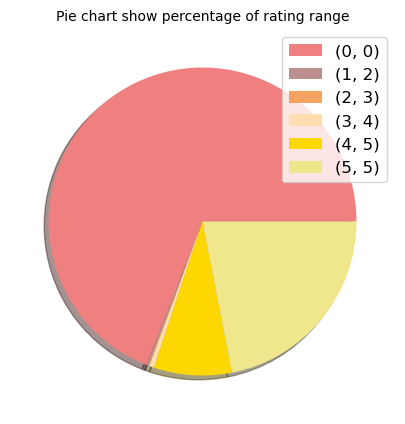

In [28]:
x = rcp_df.rating_range.value_counts().sort_index().index
y = rcp_df.rating_range.value_counts().sort_index().values
pie_chart(x, y, "Pie chart show percentage of rating range")

Qua bi·ªÉu ƒë·ªì tr√™n, nh·∫≠n th·∫•y c√°c ƒë√°nh gi√° c·ªßa kh√°ch h√†ng v·ªÅ s·∫£n ph·∫©m kh√¥ng nhi·ªÅu. V·∫´n c√≥ nhi·ªÅu m·∫∑t h√†ng ƒë∆∞·ª£c ƒë√°nh gi√° l√† 0 sao.<br>
##### Xem th·ª≠ m·ªëi quan h·ªá gi·ªØa `rating_range`, `original_price`, `all_time_quantity_sold`

In [29]:
def build_scatterplot(data, x, y, hue: None, ax, title):
    sns.scatterplot(data = data, x = x, y = y, ax = ax)
    ax.title.set_text(title)

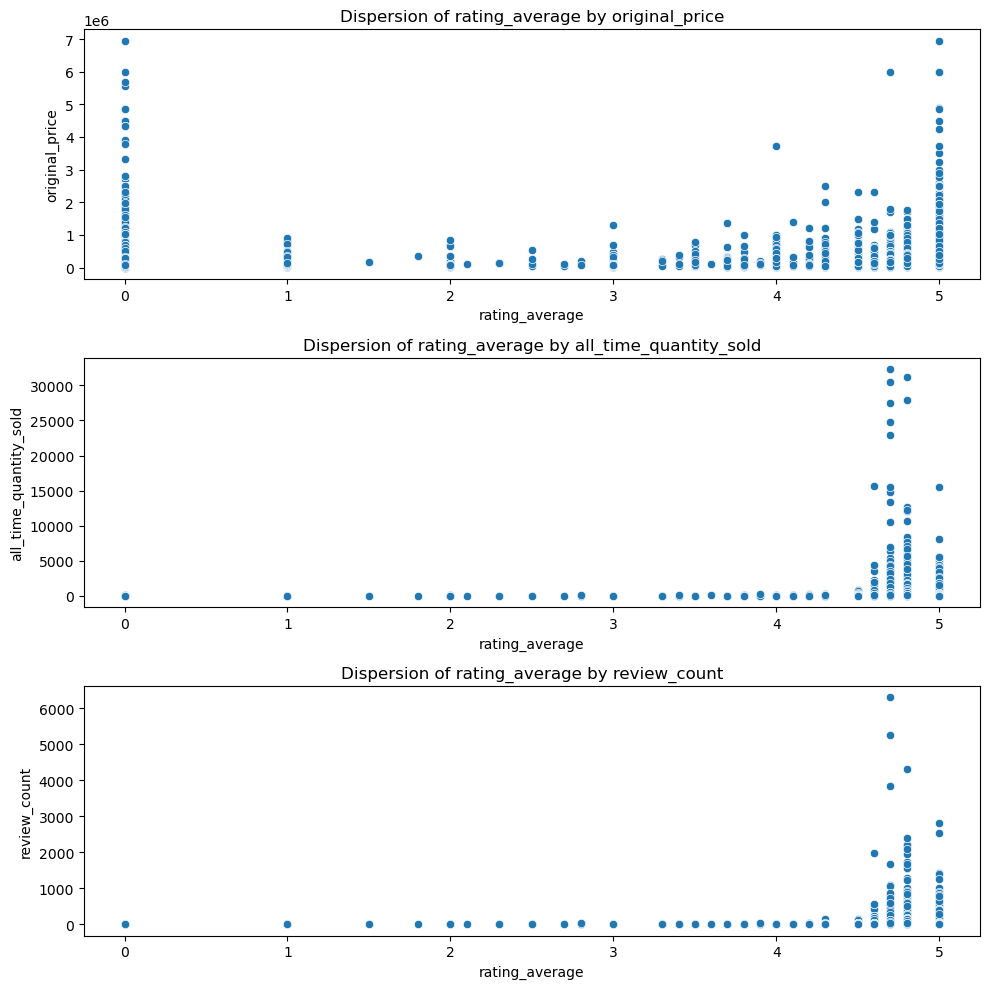

In [30]:
fig, axs = plt.subplots(3,1, figsize = (10,10))
build_scatterplot(rcp_df, x = "rating_average", y = "original_price", ax=axs[0], title = "Dispersion of rating_average by original_price", hue = None)
build_scatterplot(rcp_df, x = "rating_average", y = "all_time_quantity_sold", ax=axs[1], title = "Dispersion of rating_average by all_time_quantity_sold", hue = None)
build_scatterplot(rcp_df, x = "rating_average", y = "review_count", ax=axs[2], title = "Dispersion of rating_average by review_count", hue = None)
plt.tight_layout()

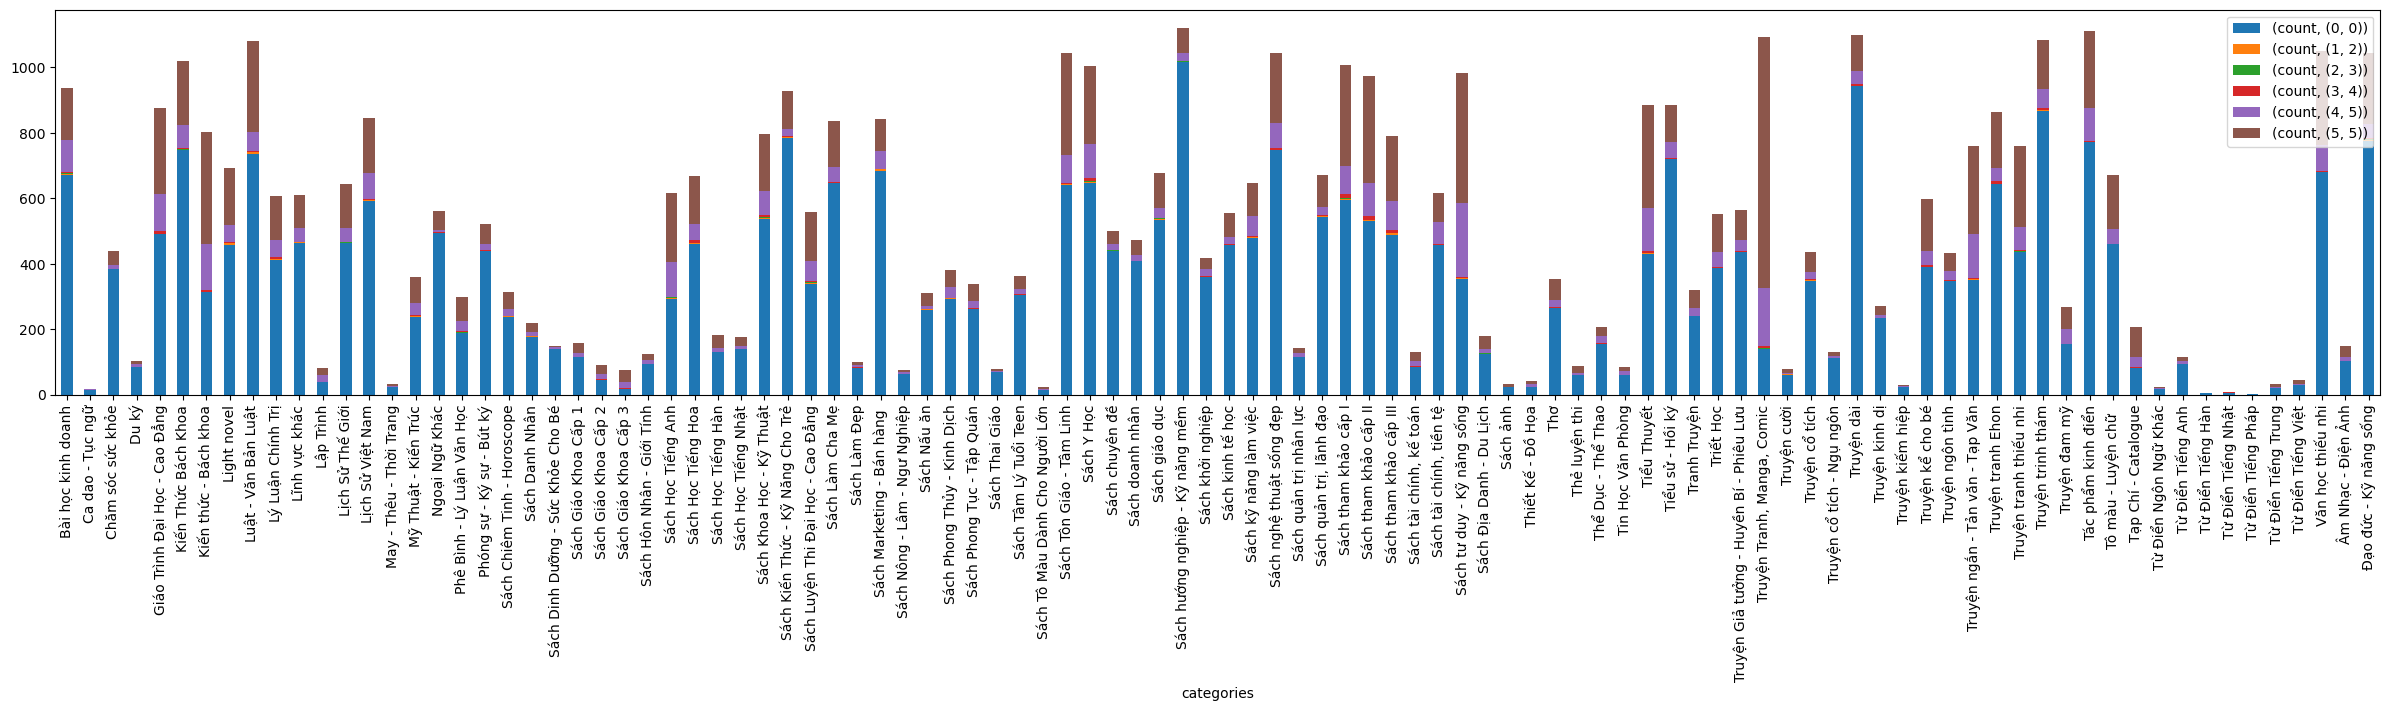

In [31]:
temp_df = rcp_df.copy()
group_df = temp_df.groupby("categories")["rating_range"].value_counts().to_frame().rename(columns = {"rating_range" : "count"}).sort_values(by = "rating_range").unstack(level = 1)
# group_df
fig, ax = plt.subplots(figsize = (30, 5))
# sns.countplot(data = group_df, x = "categories" , hue = "rating_range")
group_df.plot(kind = "bar", stacked = True, ax = ax)
plt.legend(loc = "upper right")
plt.xticks(rotation=90)
plt.show()

**D·ª± ƒëo√°n l√Ω do**<br>

V·ªõi ƒë·ªì th·ªã theo gi√° g·ªëc c·ªßa c√°c quy·ªÉn s√°ch, h·∫ßu nh∆∞ t·∫•t c·∫£ gi√° tr·ªã ƒë·ªÅu trong v√πng t·ª´ 0 ƒë·∫øn 300 ng√†n ƒë·ªìng l√† ch·ªß y·∫øu. Tuy nhi√™n v·ªõi ƒë·ªô ƒë√°nh gi√° l√† `0 sao`, h·∫ßu nh∆∞ s·ªë l∆∞·ª£t mua h√†ng x·∫•p x·ªâ ho·∫∑c ho√†n to√†n l√† 0 m·∫∑c d√π s√°ch ·ªü m·ª©c ƒë√°nh gi√° `0 sao` c√≥ t∆∞∆°ng ƒë·ªëi nhi·ªÅu s√°ch ƒë∆∞·ª£c b√°n <br>
<br>
Vi·ªác c√≥ th·ªÉ c√≥ ƒë∆∞·ª£c m·ª©c ƒë√°nh gi√° trung b√¨nh cao nh∆∞ng l·∫°i kh√° √≠t ƒë∆°n ƒë·∫∑t h√†ng, theo em d·ª± ƒëo√°n r·∫±ng:<br>
+ Vi·ªác mua h√†ng ƒë·ªëi v·ªõi c√°c kh√°ch h√†ng ƒë·∫ßu ti√™n ƒë√£ x·∫£y ra 1 v√†i tr·ª•c tr·∫∑c (nh∆∞ h∆∞ h·ªèng, kh√¥ng ƒë√∫ng nh∆∞ trong m√¥ t·∫£ s·∫£n ph·∫©m,...), d·∫´n t·ªõi s·ª± k√©m tin t∆∞·ªüng c·ªßa shop, n√™n d·∫´n ƒë·∫øn m·ª©c ƒë√°nh gi√° trung b√¨nh ng√†y m·ªôt th·∫•p ƒëi. S·ªë kh√°ch h√†ng ƒë·∫øn sau d·ª±a v√†o 1 s·ªë b√¨nh lu·∫≠n, s·ªë l∆∞·ª£t ƒë√°nh gi√° c√≥ tr√™n tiki ƒë∆∞a ra quy·∫øt ƒë·ªãnh mua h√†ng c·ªßa m√¨nh.<br>

+ C√°c quy·ªÉn s√°ch `0 sao` kh√¥ng ƒë∆∞·ª£c kh√°ch h√†ng t√¨m nhi·ªÅu, ho·∫∑c kh√¥ng qu√° n·ªïi ti·∫øng, ho·∫∑c kh√¥ng c·∫ßn thi·∫øt n√™n kh√¥ng c√≥ l∆∞·ª£t ƒë√°nh gi√° v√† b√¨nh lu·∫≠n.

+ Ngo√†i ra, th√¥ng tin ƒë∆∞·ª£c t√¨m ki·∫øm ·ªü c√¢u 1, c√≥ m·ªôt s·ªë cu·ªën s√°ch b·ªã tr√πng t√™n nh∆∞ng c√≥ nhi·ªÅu shop b√°n. Vi·ªác m·ªôt shop ƒë·∫ßy s·ª± tin t∆∞·ªüng trong su·ªët qu√° tr√¨nh b√°n online tr√™n tiki, d·∫´n ƒë·∫øn vi·ªác kh√°ch h√†ng c≈© s·∫Ω ∆∞u ti√™n mua s√°ch ·ªü shop quen thu·ªôc h∆°n l√† mua ·ªü m·ªôt shop c√≥ l∆∞·ª£t rating th·∫•p.

+ H·∫ßu nh∆∞ lo·∫°i s√°ch n√†o c≈©ng ƒë∆∞·ª£c ƒë√°nh gi√° `0 sao` l√† ch·ªß y·∫øu. Kh√¥ng bi·∫øt l√Ω do l√† t·∫°i sao. `???`

---

### **C√¢u 3 B√¨a s√°ch v√† phi√™n b·∫£n c·ªßa c√°c lo·∫°i s√°ch c√≥ ph·∫£i l√† m·ªëi quan t√¢m h√†ng c·ªßa kh√°ch h√†ng ƒë·ªÉ kh√°ch h√†ng sƒÉn ƒë√≥n ?**


- Kh√°ch h√†ng c√≥ th·∫≠t s·ª± quan tr·ªçng ƒë·ªÉ √Ω ƒë·∫øn lo·∫°i phi√™n b·∫£n v√† b√¨a s√°ch?

**Tr·∫£ l·ªùi c√¢u h·ªèi th√†nh c√¥ng** <br>
N·∫øu ch√∫ng ta bi·∫øt ƒë∆∞·ª£c nhu c·∫ßu c·ªßa kh√°ch h√†ng, vi·ªác s·∫£n xu·∫•t cho nh√† nh√† s·∫£n xu·∫•t s·∫Ω thu·∫≠n ti·ªán h∆°n, ƒë√°p ·ª©ng d∆∞·ª£c cung c·∫ßu c·ªßa th·ªã tr∆∞·ªùng. T·ª´ ƒë√≥ s·∫Ω ph√°t tri·ªÉn h∆°n trong vi·ªác ph√°t h√†nh s√°ch

Nhi·ªÅu th·ªÉ lo·∫°i s√°ch kh√°c nhau s·∫Ω c√≥ nh·ªØng lo·∫°i `book_cover` v√† `edition` kh√°c nhau.<br>
ta th·ª≠ quan s√°t xem trong ƒë√≥ c√≥ g√¨:

In [32]:
view_book_cover = pd.DataFrame(df.book_cover.unique(), columns= ['Book Cover']).transpose()
view_book_cover

0        1       2         3        4        5   \
Book Cover  NaN  B√¨a m·ªÅm  B√¨a Da  B√¨a c·ª©ng  B√¨a g·∫≠p  B√¨a r·ªùi   

                                       6                   7    8       9   \
Book Cover  B√¨a Da C√¥ng Nghi·ªáp Microfiber  B Format Paperback  Box  Boxset   

                                                  10          11  \
Book Cover  T√πy ch·ªçn phi√™n b·∫£n b√¨a c·ª©ng ho·∫∑c b√¨a m·ªÅm  Jigsaw box   

                                                  12                  13  \
Book Cover  Counterpack holds 48 Mini Activity Books  B-format Paperback   

                    14              15         16         17  
Book Cover  Board book  Mix Media Pack  Paperback  Hardcover

In [33]:
view_edition = pd.DataFrame(df.edition.unique(), columns= ['Edition']).transpose()
view_edition

0        1        2           3                          4    \
Edition  NaN  b√¨a m·ªÅm  B√åA M·ªÄM  Ti·∫øng Vi·ªát  T·∫∑ng k√®m bookmark & thi·ªáp   

                  5         6             7             8         9    ...  \
Edition  B·∫£n Gi·ªõi H·∫°n  ƒê·∫ßu ti√™n  B·∫£n ƒê·∫∑c Bi·ªát  l·∫ßn th·ª© nh·∫•t  b√¨a m·ªÅm   ...   

             355                                 356                     357  \
Edition  T·∫°p ch√≠  20 ph·ª• n·ªØ Vi·ªát Nam truy·ªÅn c·∫£m h·ª©ng  ƒê·ªîI M·ªöI CHU·ªñI CUNG ·ª®NG   

                                                       358  \
Edition  Danh s√°ch 50 c√¥ng ty ni√™m y·∫øt t·ªët nh·∫•t Vi·ªát Na...   

                         359                        360 361 362          363  \
Edition  Chuy√™n ƒë·ªÅ du thuy·ªÅn  30 Doanh nghi·∫πp h√†o ph√≥ng   8   9  s√°ch n·∫•u ƒÉn   

            364  
Edition  kh√¥ng   

[1 rows x 365 columns]

Ta th·∫•y d·ªØ li·ªáu v·∫´n ch∆∞a ƒë∆∞·ª£c s·∫°ch, v·∫´n c√≤n nh·ªØng gi√° tr·ªã `NaN`<Br>
**B∆∞·ªõc 1**: Ta s·∫Ω chuy·ªÉn c√°c gi√° tr·ªã `NaN` tr·ªü th√†nh `None`. 

In [34]:
df.loc[df.edition.isnull(), 'edition'] = 'None'
df.loc[df.book_cover.isnull(), 'book_cover'] = 'None'

Ta c√≥ th·ªÉ th·∫•y r·∫±ng c√≥ nh·ªØng Edition nh∆∞ l√† 'B√¨a m·ªÅm', 'B√åA M·ªÄM', ... v√† c√≥ nh·ªØng Book Cover nh∆∞ l√† 'Box', 'Boxset', ...<Br>
T·∫°i sao c√≥ nh·ªØng `edition` c√≥ ch·ª©a c√°c `book_cover`. V·∫≠y c√≥ th·ªÉ l√† do c√°c `categories` kh√°c nhau n√™n c√≥ c√°c `edition` v√† `book_cover` kh√°c nhau<Br>
Ta th·ª≠ quan s√°t 1 v√†i `categories` nh∆∞ `Light Novel`, `Du k√Ω`, ... 

In [35]:
LightNovel_view = get_df_by_categories('Light novel')
DuKy_view = get_df_by_categories('Du k√Ω')

In [36]:
pd.DataFrame({'Quantity Sold' : LightNovel_view.groupby(['edition', 'book_cover'])['all_time_quantity_sold'].sum()}).reset_index().rename({'edition': 'Edition', 'book_cover': 'Book Cover'}, axis = 1)

Edition Book Cover  Quantity Sold
0               B·∫£n Gi·ªõi H·∫°n    B√¨a m·ªÅm             11
1               B·∫£n ƒê·∫∑c Bi·ªát    B√¨a m·ªÅm              3
2                       None   B√¨a c·ª©ng             24
3                       None    B√¨a m·ªÅm          34948
4                       None    B√¨a r·ªùi             13
5                       None       None           1961
6  T·∫∑ng k√®m bookmark & thi·ªáp    B√¨a m·ªÅm            102
7                   ƒê·∫ßu ti√™n    B√¨a m·ªÅm              3

In [37]:
pd.DataFrame({'Quantity Sold' : DuKy_view.groupby(['edition', 'book_cover'])['all_time_quantity_sold'].sum()}).reset_index().rename({'edition': 'Edition', 'book_cover': 'Book Cover'}, axis = 1)

Edition Book Cover  Quantity Sold
0     B√åA M·ªÄM    B√¨a g·∫≠p              0
1        None     B√¨a Da             19
2        None   B√¨a c·ª©ng             13
3        None    B√¨a m·ªÅm            927
4        None       None            787
5  Ti·∫øng Vi·ªát    B√¨a m·ªÅm            205
6     b√¨a m·ªÅm    B√¨a g·∫≠p              0

Qua ƒë√¢y c√≥ th·ªÉ th·∫•y c√°c `categories`, ta th·∫•y m·ªói th·ªÉ lo·∫°i ƒë∆∞·ª£c chia th√†nh c√°c `edition` v·ªõi `book_cover` kh√°c nhau.

V·∫≠y ta s·∫Ω 1 lo·∫°i `categories` ƒë·ªÉ th·ª±c hi·ªán quan s√°t d·ªØ li·ªáu.<Br>
**B∆∞·ªõc 2**: Ta s·∫Ω ch·ªçn th·ªÉ lo·∫°i `Light novel`

In [38]:
new_df = get_df_by_categories('Light novel')

**B∆∞·ªõc 3**: ƒê·ªÉ quan s√°t ƒë∆∞·ª£c r√µ r√†ng h∆°n v·ªÅ xu h∆∞·ªõng, ta s·∫Ω quan s√°t 2 nh√≥m s√°ch: 
- nh√≥m b·∫Øt ƒë·∫ßu b√°n t·ª´ 2021
- nh√≥m b·∫Øt ƒë·∫ßu b√°n t·ª´ 2022

In [39]:
new_df_2021 = new_df.loc[(new_df['day_ago_created'] > 365) & (new_df['day_ago_created'] <= 730)]
new_df_2022 = new_df.loc[new_df['day_ago_created'] <= 365]

plot_df_2022 = new_df_2022.groupby(['edition', 'book_cover'])['all_time_quantity_sold'].sum()
plot_df_2021 = new_df_2021.groupby(['edition', 'book_cover'])['all_time_quantity_sold'].sum()

**B∆∞·ªõc 4**: Ta s·∫Ω tr·ª±c quan ho√° b·∫±ng bi·ªÉu ƒë·ªì ƒë·ªÖ ti·ªán quan s√°t v√† ƒë√°nh gi√° h∆°n:

[Text(0.5, 0, 'Edition & Book Cover'), Text(0, 0.5, 'Quantity Sold')]

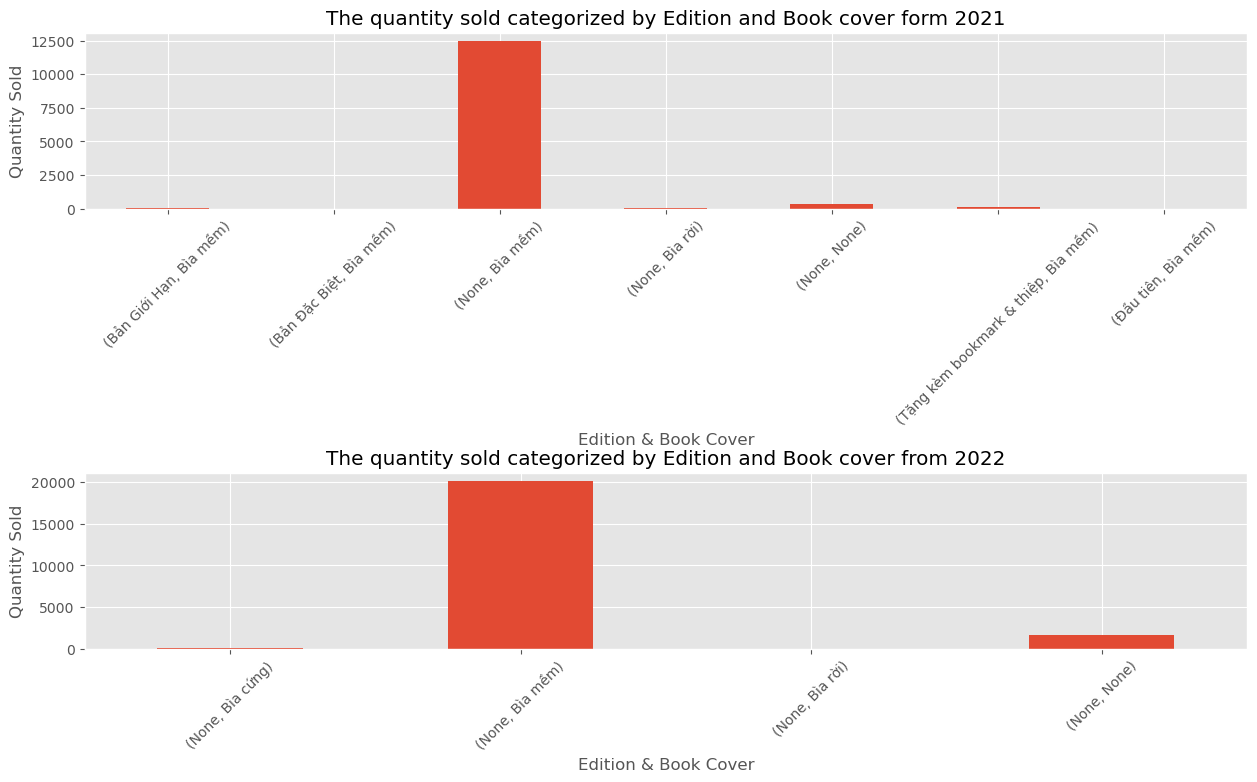

In [40]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(15, 8))

plt.subplots_adjust(hspace = 1.5)
plot_df_2021.plot.bar(ax = axes[0], rot = 45)
axes[0].set_title('The quantity sold categorized by Edition and Book cover form 2021')
axes[0].set(xlabel = 'Edition & Book Cover', ylabel = 'Quantity Sold')

plt.subplots_adjust(hspace = 1.5)
plot_df_2022.plot.bar(ax = axes[1], rot = 45)
axes[1].set_title('The quantity sold categorized by Edition and Book cover from 2022')
axes[1].set(xlabel = 'Edition & Book Cover', ylabel = 'Quantity Sold')


Qua 2 bi·ªÉu ƒë·ªì th·ªÉ hi·ªán s·ªë l∆∞·ª£ng b√°n ƒë∆∞·ª£c t·ª´ nƒÉm 2021 v√† s·ªë l∆∞·ª£ng b√°n ƒë∆∞·ª£c t·ª´ nƒÉm 2022:
- NƒÉm 2021, ta th·∫•y c√≥ 5 lo·∫°i `edition` v√† 4 lo·∫°i `book_cover`. C√≥ th·ªÉ th·∫•y kh√°ch h√†ng tr√™n tiki c√≥ v·∫ª r√¢t chu·ªông c√°c lo·∫°i s√°ch lo·∫°i th∆∞·ªùng v√† b√¨a m·ªÅm v√† c√°c lo·∫°i c√≤n l·∫°i kh√°ch h√†ng mua s·ªë l∆∞·ª£ng kh√¥ng nhi·ªÅu.
- NƒÉm 2022, ta th·∫•y ch·ªâ c√≤n l·∫°i 1 lo·∫°i `edition` v√† v·∫´n c√≤n 4 lo·∫°i `book_cover`. V·∫≠y qua 1 nƒÉm th√¨ c√°c lo·∫°i s√°ch nh·∫≠p v·ªÅ kh√¥ng c√≤n c√°c `edition`, ch·ªâ c√≤n None (phi√™n b·∫£n th∆∞·ªùng). C√°c lo·∫°i s√°ch n√†y nh·∫≠p trong nƒÉm 2022 nh·∫≠p v·ªÅ v·∫´n ƒë∆∞·ª£c c√°c kh√°ch h√†ng v·∫´n chu·ªông c√°c lo·∫°i s√°ch lo·∫°i th∆∞·ªùng v√† b√¨a m·ªÅm v√† c√°c lo·∫°i c√≤n l·∫°i v·∫´n kh√¥ng ƒë∆∞·ª£c nhi·ªÅu<Br>

V·∫≠y ta c√≥ th·ªÉ suy ƒëo√°n th·ª≠ xem nƒÉm 2023, nhu c·∫ßu kh√°ch h√†ng v·∫´n l√† c√°c s√°ch b√¨a m·ªÅm v·ªõi phi√™n b·∫£n th∆∞·ªùng chƒÉng?

---

### **C√¢u 4: C√°c cu·ªën s√°ch ƒë∆∞·ª£c nhi·ªÅu s·ª± quan t√¢m ƒë√°nh gi√° t·ª´ kh√°ch h√†ng, c√≥ khuy·∫øn m√£i nh∆∞ th·∫ø n√†o ?**

- C√≥ ph·∫£i khi s·ª± ƒë√°nh gi√° (`rating_average`) c·ªßa 1 cu·ªën s√°ch n√†o ƒë√≥ cao th√¨ shop s·∫Ω khuy·∫øn m√£i ∆∞u ƒë√£i nhi·ªÅu (`discount_rate`) cho kh√°ch h√†ng?

**Tr·∫£ l·ªùi c√¢u h·ªèi th√†nh c√¥ng**

T√¨m hi·ªÉu ƒë∆∞·ª£c v·ªÅ vi·ªác ƒë√°nh gi√° c·ªßa kh√°ch h√†ng c√≥ ·∫£nh h∆∞·ªüng ƒë·∫øn gi·∫£m gi√° c·ªßa shop kh√¥ng? t·ª´ ƒë√≥ shop c√≥ th·ªÉ c√≥ ra th√™m c√°c lo·∫°i event sale h·ª£p l√Ω ƒë·ªÉ tƒÉng s·ª± tin t∆∞·ªüng c·ªßa kh√°ch h√†ng v√† l·∫•y ƒë∆∞·ª£c th√™m c√°c rating cao

<font color=red>Kh√≥ khƒÉn</font>:
- Quan s√°t to√†n b·ªô s·ªë l∆∞·ª£ng s·∫Ω d·∫´n ƒë·∫øn ch√∫ng ta kh√≥ th·∫•y s·ª± kh√°c bi·ªát trong thay ƒë·ªïi t·ªâ l·ªá `discount_rate`. Ta s·∫Ω s·ªë li·ªáu th√†nh th√†nh s√°ch d∆∞·ª£c b√°n v√†o nƒÉm 2021 v√† nƒÉm 2022.
- Ngo√†i ra, ta c≈©ng s·∫Ω t·∫°o 1 kho·∫£ng m·ª©c ratings:

**(0,0)** ·ª©ng v·ªõi 0 sao <br>
**(0,1)** ·ª©ng v·ªõi (0,1) <br>
**(1,2)** ·ª©ng v·ªõi [1,2) <br>
**(2,3)** ·ª©ng v·ªõi [2,3) <br>
**(3,4)** ·ª©ng v·ªõi [3,4) <br>
**(4,5)** ·ª©ng v·ªõi [4,5) <br>
**(5,5)** ·ª©ng v·ªõi 5 sao <br>

**B∆∞·ªõc 1**: Ta s·∫Ω l·∫•y d·ªØ li·ªáu l√† nh·ªØng cu·ªën s√°ch b·∫Øt ƒë·∫ßu ƒë∆∞·ª£c b√°n v√†o nƒÉm 2021 v√† v√†o nƒÉm 2022

In [41]:
df_2021 = df.loc[(df['day_ago_created'] > 365) & (df['day_ago_created'] <= 730)]
df_2022 = df.loc[df['day_ago_created'] <= 365]

new_df_2021 = df_2021[['discount_rate', 'rating_average']]
new_df_2022 = df_2022[['discount_rate', 'rating_average']]

**B∆∞·ªõc 2**: Ta s·∫Ω ƒë√°nh gi√° l·∫°i c√°c m·ª©c ratings ƒë√£ ƒë∆∞·ª£c chia ra nh∆∞ tr√™n

In [42]:
temp_df_2021 = pd.DataFrame({"rating_range": new_df_2021.rating_average.apply(rating_range)})
temp_df_2022 = pd.DataFrame({"rating_range": new_df_2022.rating_average.apply(rating_range)})

new_df_2021 = pd.concat([new_df_2021, temp_df_2021], axis= 1)
new_df_2022 = pd.concat([new_df_2022, temp_df_2022], axis= 1)

**B∆∞·ªõc 3**: Ta s·∫Ω tr·ª±c quan ho√° d·ªØ li·ªáu ƒë·ªÉ ti·ªán quan s√°t h∆°n

[Text(0.5, 0, 'Rating Range'), Text(0, 0.5, 'Discount Rate')]

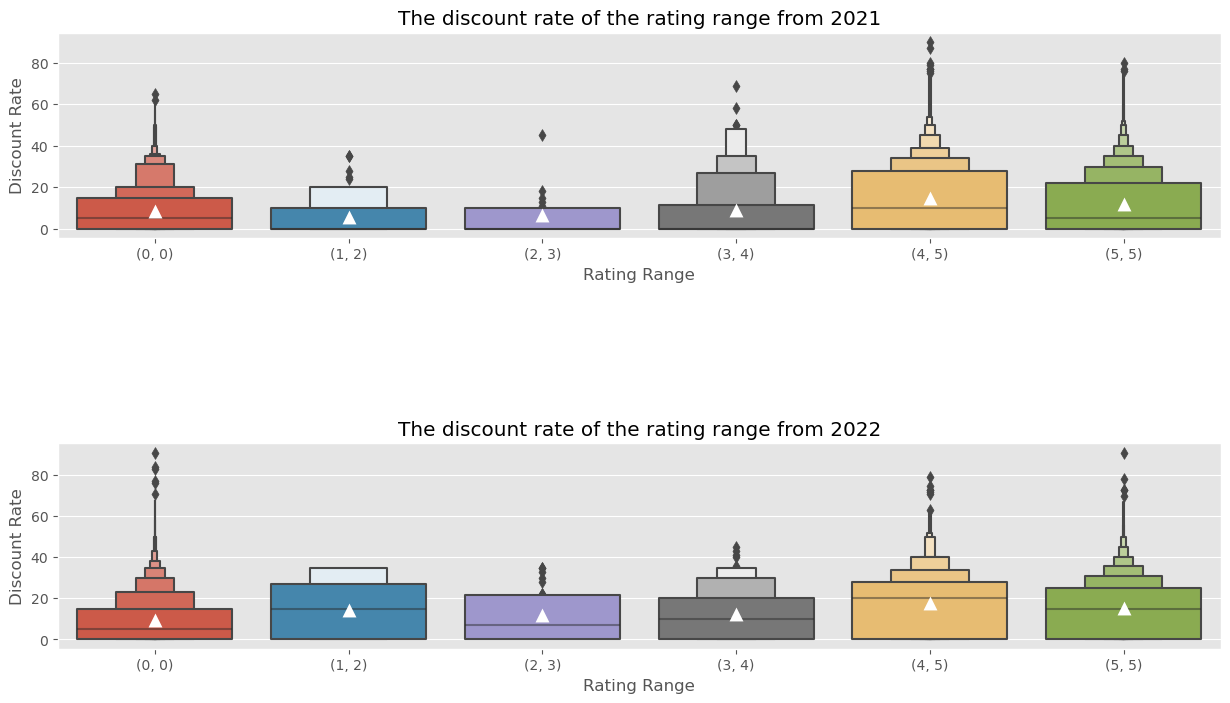

In [43]:
new_df_2021 = new_df_2021.sort_values('rating_range')
new_df_2022 = new_df_2022.sort_values('rating_range')

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(15, 8))
plt.subplots_adjust(hspace = 1)

mean_2021 = new_df_2021.groupby(['rating_range'])['discount_rate'].mean()
mean_2021 = mean_2021.to_frame().rename(columns= {'discount_rate': 'Mean'}).reset_index()
mean_2022 = new_df_2022.groupby(['rating_range'])['discount_rate'].mean()
mean_2022 = mean_2022.to_frame().rename(columns= {'discount_rate': 'Mean'}).reset_index()

sns.swarmplot(data = mean_2021, x = 'rating_range', y = 'Mean', ax = axes[0], marker = '^', s = 10, palette= ['White'], dodge= True)
sns.swarmplot(data = mean_2022, x = 'rating_range', y = 'Mean', ax = axes[1], marker = '^', s = 10, palette= ['White'], dodge= True)

sns.boxenplot(data = new_df_2021, x = 'rating_range', y = 'discount_rate', ax = axes[0])
axes[0].set_title('The discount rate of the rating range from 2021')
axes[0].set(xlabel = 'Rating Range', ylabel = 'Discount Rate')

sns.boxenplot(data = new_df_2022, x = 'rating_range', y = 'discount_rate', ax = axes[1])
axes[1].set_title('The discount rate of the rating range from 2022')
axes[1].set(xlabel = 'Rating Range', ylabel = 'Discount Rate')

In [44]:
mean_2022

rating_range       Mean
0       (0, 0)   9.266816
1       (1, 2)  14.382979
2       (2, 3)  11.730769
3       (3, 4)  12.198020
4       (4, 5)  17.811910
5       (5, 5)  15.236525

Qua 2 bi·ªÉu ƒë·ªì th·ªÉ hi·ªán s·ª± gi·∫£m gi√° c·ªßa c√°c cu·ªën s√°ch ƒë∆∞·ª£c b√°n t·ª´ 2 nh√≥m b√°n b·∫Øt ƒë·∫ßu v√†o nƒÉm 2021 v√† v√†o nƒÉm 2022:
- Nh·ªØng cu·ªën s√°ch ƒë∆∞·ª£c m·ªü b√°n v√†o nƒÉm 2021 th√¨ ta nh·∫≠n th·∫•y r·∫±ng v·ªÅ m·ª©c ƒë·ªô ƒëa d·∫°ng v·ªÅ `rating_range` v√† `discount_rate` l√† c√≥. ƒê·ªÉ √Ω nh·ªØng cu·ªën s√°ch ƒë∆∞·ª£c ƒë√°nh gi√° ·ªü m·ª©c [4,5) sao th√¨ th·∫•y r·∫±ng ƒëa d·∫°ng t·ª´ 0% cho ƒë·∫øn 30% v√† trung b√¨nh r∆°i v√†o kho·∫£ng 15%, c√≤n s√°ch ƒë√°nh gi√° 5* th√¨ r∆°i t·∫ßm t·ª´ 0% cho ƒë·∫øn 22% v√† m·ª©c trung b√¨nh r∆°i v√†o 12%. V√† ƒë·ªô ƒëa d·∫°ng ƒë·ªëi v·ªõi c√°c s·∫£n ph·∫©m kh√¥ng ƒë∆∞·ª£c ƒë√°nh gi√° v√† ƒë√°nh gi√° th·∫•p tr·∫£i gi·∫£m d·∫ßn ƒë·ªÅu nhi·ªÅu t·ª´ 0% ƒë·∫øn 15%.
- V√†o nƒÉm 2022 th√¨ c√°c cu·ªën s√°ch c√≥ nhi·ªÅu m·ª©c ƒë·ªô ƒëa d·∫°ng v·ªÅ `rating_range`  v√† `discount_rate` v·∫µn nh∆∞ nƒÉm 2021. Tuy nhi√™n t·∫•t c·∫£ m·ªçi v√πng ƒë√°nh gi√° ƒë·ªÅu r∆°i v√†o trong t·∫ßm 0% ƒë·∫øn 25% v√† t·∫•t c·∫£ ƒë·ªÅu c√≥ m·ª©c trung b√¨nh r∆°i v√†o 11% ƒë·∫øn 16%. V·∫≠y c√≥ v·∫ª nh∆∞ nƒÉm 2022 c√°c shop ƒë√£ n·∫Øm b·∫Øt ƒë∆∞·ª£c con s·ªë `discount_rate` m√† d·ªØ li·ªáu ƒë√£ ƒë√°nh gi√° v√†o nƒÉm 2021 r·ªìi chƒÉng?

V·∫≠y ta c√≥ th·ªÉ d·ª± ƒëo√°n, c√°c shop v·∫´n s·∫Ω m·ªü ti·∫øp c√°c ∆∞u ƒë√£i cho c√°c lo·∫°i s√°ch t·∫ßm 15% ƒë·ªÉ ti·∫øp t·ª•c thu h√∫t c√°c kh√°ch h√†ng v√†o 2023?

---

### **C√¢u 5: S·ªë trang v√† b√¨a c·ªßa 1 quy·ªÉn s√°ch c√≥ g√¢y ·∫£nh h∆∞·ªüng ƒë·∫øn gi√° th√†nh ti·ªÅn c√°c cu·ªën s√°ch kh√¥ng?**

- C√≥ ph·∫£i r·∫±ng 1 quy·ªÉn s√°ch c√†ng nhi·ªÅu trang hay tu·ª≥ lo·∫°i b√¨a m√† gi√° th√†nh cu·ªën s√°ch kh√°c nhau? 
- C√πng 1 s·ªë l∆∞·ª£ng trang v·ªõi c√πng 1 lo·∫°i b√¨a th√¨ gi√° c·∫£ c·ªßa c√°c lo·∫°i s√°ch ch√™nh l·ªách nhau nh∆∞ n√†o?

**Tr·∫£ l·ªùi c√¢u h·ªèi th√†nh c√¥ng** <Br>
Ch√∫ng ta s·∫Ω ph√¢n bi·ªát ƒë∆∞·ª£c gi√° th√†nh c·ªßa c√°c lo·∫°i s√°ch, t·ª´ ƒë√≥ s·∫Ω ti√™u d√πng h·ª£p l√Ω h∆°n v√†o s√°ch.

**B∆∞·ªõc 1**: Ta s·∫Ω ki·ªÉm tra xem l√† c√°c trang s√°ch c√≥ h·ª£p l·ªá ch∆∞a? Ta s·∫Ω d√πng bi·ªÉu ƒë·ªì ƒë·ªÉ th·ªÉ hi·ªán ƒëi·ªÅu ƒë√≥

[Text(0.5, 0, 'Unique number of pages'), Text(0, 0.5, 'Number of page')]

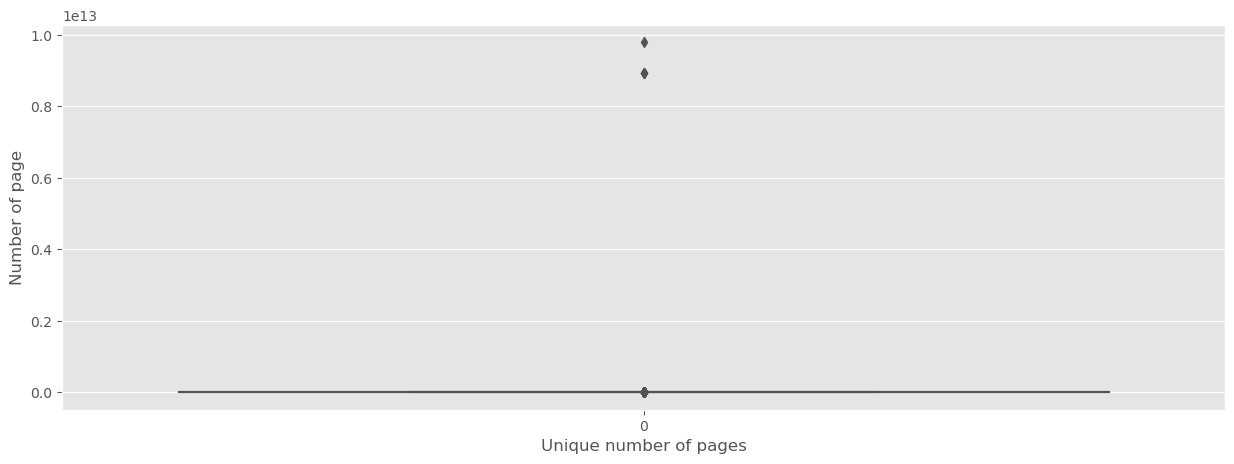

In [45]:
page_df = df.number_of_page.unique()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(data = page_df)
ax.set(xlabel = 'Unique number of pages', ylabel = 'Number of page')

Qua ƒë·ªì th·ªã tr√™n c√≥ th·ªÉ r√µ r√†ng th·∫•y l√† ƒëi·ªÉm ngo·∫°i lai c√≥ gi√° tr·ªã qu√° l·ªõn <Br>
Theo th√¥ng tin, ki·∫øm ƒë∆∞·ª£c tr√™n google (link: https://www.noron.vn/post/ban-co-biet-sach-va-nhung-ky-luc-thu-vi-40dxrlpfh9t4) th√¨ cu·ªën s√°ch d√†y nh·∫•t ch·ªâ c√≥ 5000 trang.<Br>
**D·ª± ƒëo√°n**: c√≥ th·ªÉ l√† do nh·∫≠p l·ªói th√¥ng s·ªë trang hay nh·∫≠p thi·∫øu? 

**B∆∞·ªõc 2**: Ta s·∫Ω lo·∫°i b·ªè nh·ªØng cu·ªën s√°ch c√≥ tr√™n 5000 trang v√† lo·∫°i nh·ªØng cu·ªën s√°ch 0 trang.<Br>

In [46]:
new_df = df.loc[(df['number_of_page'] <= 5000) & (df['number_of_page'] != 0)]

**B∆∞·ªõc 3**: Ta s·∫Ω minh ho·∫° m·ªëi li√™n h·ªá gi·ªØa gi√° ti·ªÅn v√† s·ªë trang c·ªßa s√°ch

[Text(0.5, 0, 'Original price'), Text(0, 0.5, 'Number of page')]

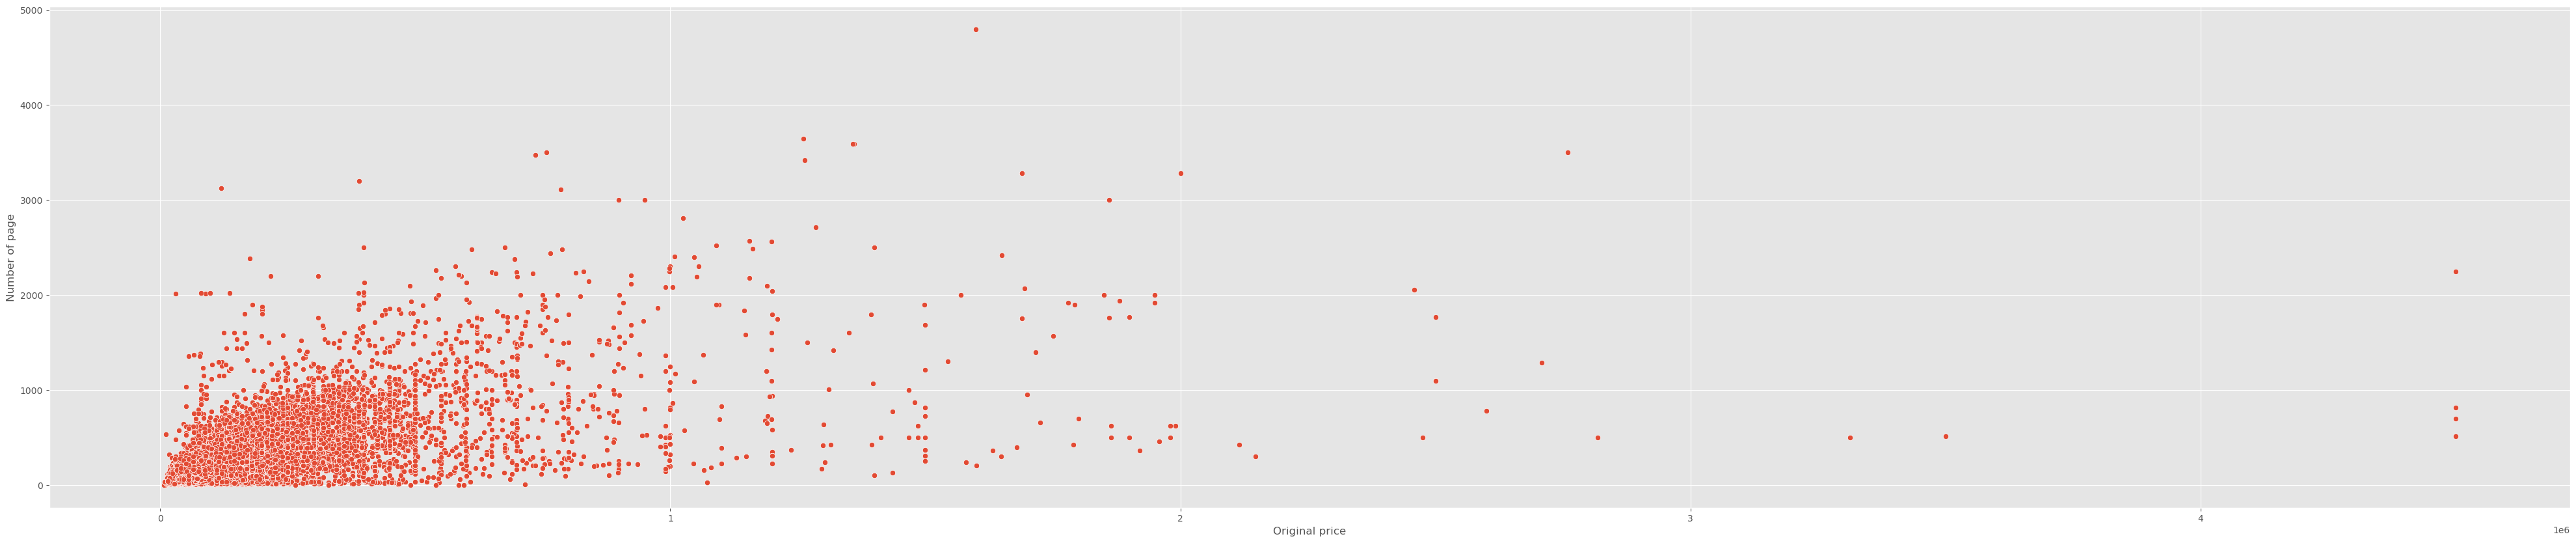

In [47]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(50, 10))

sns.scatterplot(data = new_df[['number_of_page', 'original_price']], x = 'original_price', y = 'number_of_page')
ax.set(xlabel = 'Original price', ylabel = 'Number of page')

**B∆∞·ªõc 4**: Ta s·∫Ω minh ho·∫° m·ªëi li√™n h·ªá gi·ªØa gi√° ti·ªÅn v√† b√¨a s√°ch c·ªßa s√°ch

[Text(0.5, 0, 'Original price'), Text(0, 0.5, 'Number of page')]

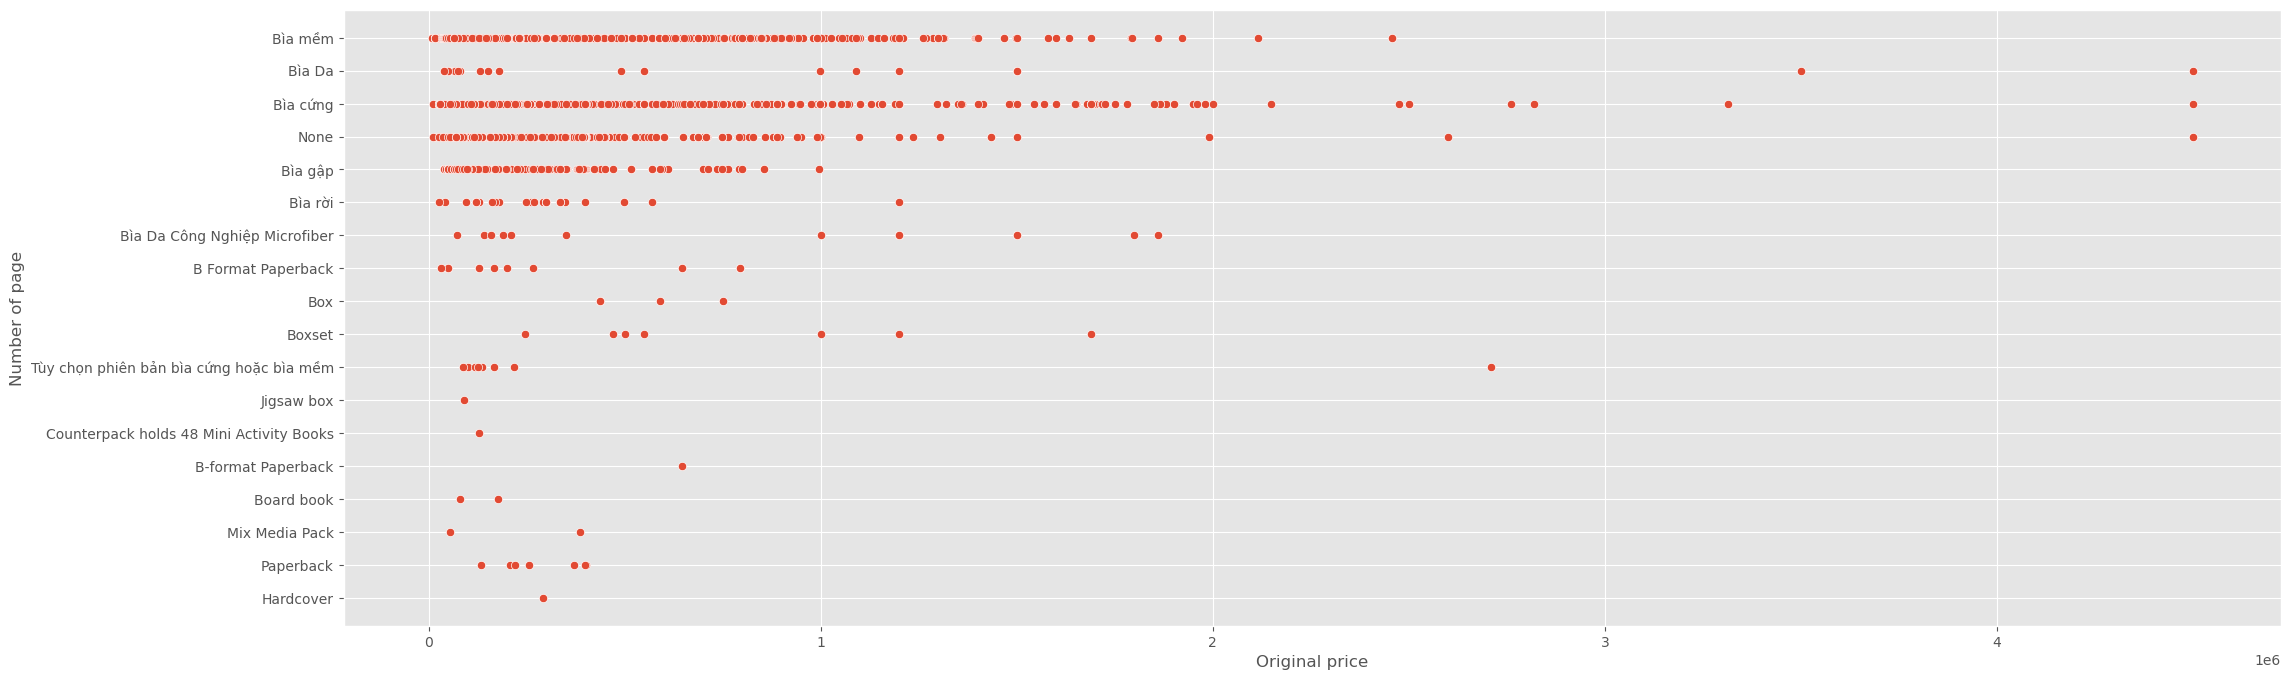

In [48]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(25, 8))

ax = sns.scatterplot(data = new_df[['original_price', 'book_cover']], x = 'original_price', y = 'book_cover')
ax.set(xlabel = 'Original price', ylabel = 'Number of page')



Qua 2 bi·ªÉu ƒë·ªì tr√™n, ta c√≥ th·ªÉ nh·∫≠n x√©t r·∫±ng:
- V·ªõi bi·ªÉu ƒë·ªì th·ª© 1, ta th·∫•y v·ªõi nh·ªØng cu·ªën s√°ch ƒë∆∞·ª£c b√°n ra t·∫ßm kho·∫£ng d∆∞·ªõi 1000 trang th√¨ gi√° ti·ªÅn n√†y ƒë·ªô kho·∫£ng 0 ƒë·ªìng cho ƒë·∫øn 500 ngh√¨n ƒë·ªìng. Ngo√†i ra, c√≥ v·∫ª nh∆∞ s·ªë trang h·∫ßu nh∆∞ kh√¥ng ƒë·ªìng bi·∫øn v·ªõi s·ªë trang, v·∫´n th·∫•y chi·ªÅu h∆∞·ªõng n·∫øu gi√° ti·ªÅn c√†ng m·∫Øc th√¨ s·ªë trang tƒÉng theo v√† v·∫´n c√≥ tr∆∞·ªùng h·ª£p s·ªë trang √≠t m√† ti·ªÅn v·∫´n cao (tr∆∞·ªùng h·ª£p nhi·ªÅu trang th√¨ gi√° ti·ªÅn c√†ng r·∫ª th√¨ h·∫ßu nh∆∞ l√† kh√¥ng).
- V·ªõi bi·ªÉu ƒë·ªì th·ª© 2, ta th·∫•y v·ªõi nh·ªØng cu·ªën s√°ch c√≥ `b√¨a m·ªÅm, b√¨a c·ª©ng, kh√¥ng b√¨a, b√¨a g·∫≠p` th√¨ m·ª©c ƒë·ªô ph√¢n b·ªë nhi·ªÅu ·ªü c√°c gi√° ti·ªÅn 500 ngh√¨n ƒë·ªìng. Tr√™n 500 ngh√¨n th√¨ `b√¨a g·∫≠p v√† kh√¥ng b√¨a` c√≥ d·∫•u hi·ªáu th∆∞a d·∫ßn trong khi `b√¨a m·ªÅm v√† b√¨a c·ª©ng` v·∫´n ph√¢n b·ªë d·∫ßy ƒë·∫∑c cho t·ªõi gi√° 2 tri·ªáu ƒë·ªìng. Hmm v·∫≠y c√≥ th·ªÉ n√≥i ch·∫•t li·ªáu `b√¨a m·ªÅm v√† b√¨a c·ª©ng` c√≥ th·ªÉ quy·∫øt ƒë·ªãnh gi√° ti·ªÅn c·ªßa 1 cu·ªën s√°ch chƒÉng? Trong khi c√≤n l·∫°i ph√¢n b·ªë r·ªùi r·∫°c kh√¥ng r√µ ƒë∆∞·ª£c d·∫•u hi·ªáu ƒë·ªÉ ƒë√°nh gi√°. ü§î

V·∫≠y qua ƒë√≥ c√≥ th·ªÉ th·∫•y `original_price` c√≥ ƒëi chung v·ªõi `book_cover`, `number_of_page`. T·ª´ ƒë√≥ ta c√≥ th·ªÉ ƒë√°nh gi√° gi√° c·∫£ c·ªßa 1 cu·ªën s√°ch c√≥ h·ª£p l√Ω hay kh√¥ng ƒë·ªÉ mua h√†ng

---

### **C√¢u 6: Xu h∆∞·ªõng t√¨nh tr·∫°ng c·ªßa c√°c cu·ªën s√°ch ng√†y nay ?**

**Tr·∫£ l·ªùi c√¢u h·ªèi th√†nh c√¥ng** <Br>
- C√≥ th·ªÉ bi·∫øt ƒë∆∞·ª£c t√¨nh tr·∫°ng c·ªßa c√°c quy·ªÉn s√°ch tr√™n tiki nh∆∞ th·∫ø n√†o. (T·ªìn kho, H·∫øt h√†ng hay ƒê·∫∑t tr∆∞·ªõc)
- D·ª± t√≠nh cho vi·ªác mua s√°ch. Camp s√°ch tr√™n tiki <br>
- Ph√°t tri·ªÉn 1 s·ªë c√¥ng vi·ªác mua s√°ch h·ªô.

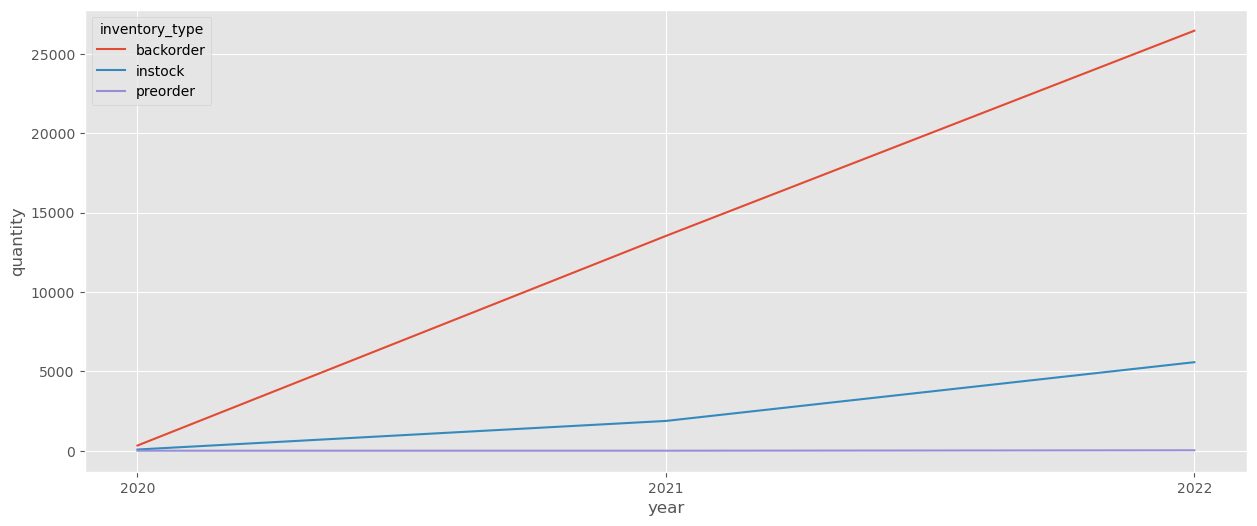

In [49]:
def Year(x):
    if x <= 365:
        return '2022'
    elif x <= 730:
        return '2021'
    elif x <= 1095:
        return '2020'
    else:
        return '2019'

new_df = df[['day_ago_created', 'inventory_type']]
temp_df = pd.DataFrame({'year': new_df['day_ago_created'].apply(Year)})
new_df = pd.concat([temp_df, new_df], axis = 1)
new_df = new_df.loc[new_df['year'] != '2019']

line_graph = new_df.groupby(['inventory_type'])['year'].value_counts().unstack(fill_value= 0).stack().reset_index()
line_graph.columns = [*line_graph.columns[:-1], 'quantity']
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(ax = ax, data = line_graph, x = 'year', y = 'quantity', hue = 'inventory_type')
plt.show()

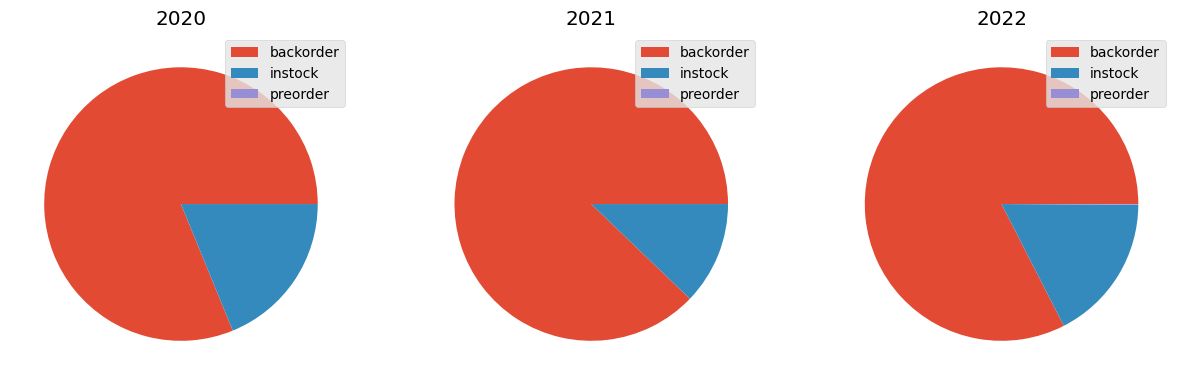

In [50]:
pie_df_20 = line_graph.loc[line_graph['year'] == '2020']
pie_df_21 = line_graph.loc[line_graph['year'] == '2021']
pie_df_22 = line_graph.loc[line_graph['year'] == '2022']

plt.style.use('ggplot')
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,15))
plt.subplots_adjust(hspace = 0.5)

axes[0].pie(pie_df_20['quantity'])
axes[0].legend(pie_df_20['inventory_type'])
axes[0].set_title("2020")

axes[1].pie(pie_df_21['quantity'])
axes[1].legend(pie_df_21['inventory_type'])
axes[1].set_title("2021")

axes[2].pie(pie_df_22['quantity'])
axes[2].legend(pie_df_22['inventory_type'])
axes[2].set_title("2022")

plt.show()

Qua c√°c bi·ªÉu ƒë·ªì line v√† pie ta th·∫•y r·∫±ng: <br>
- s·ªë l∆∞·ª£ng backorder (ƒë√£ h·∫øt h√†ng v√† ƒëang v·ªÅ l·∫°i h√†ng) th√¨ ng√†y c√†ng tƒÉng v·ªçt so qua c√°c nƒÉm.
- S·ªë l∆∞·ª£ng instock (c√≤n h√†ng) th√¨ c≈©ng tƒÉng nh·∫π.
- C√≤n s·ªë l∆∞·ª£ng pre order th√¨ ch·ªâ m·ªói t·ª´ nƒÉm 2022 c√≥ 27 s·∫£n ph·∫©m v√† t·ª´ nƒÉm 2021, t·ª´ nƒÉm 2020 th√¨ l·∫°i kh√¥ng c√≥ (ch·ª©ng t·ªè c√°c s·∫£n ph·∫©m ƒë∆∞·ª£c pre order ƒë√£ ƒë∆∞·ª£c v·ªÅ kh√¥ng qu√° 1 nƒÉm :)

D·ª± ƒëo√°n ƒë∆∞·ª£c r·∫±ng c√°c s·∫£n ph·∫©m v√†o nƒÉm 2023 c√≥ th·ªÉ h·∫øt h√†ng c√†ng nhanh => kh√°ch h√†ng c·∫ßn ph·∫£i tranh nhau mua nhanh h∆°n, nhi·ªÅu hi·ªán t∆∞·ª£ng ƒë·ª©ng camp s√°ch h∆°n chƒÉng? . Tuy nhi√™n th√¨ s·ªë l∆∞·ª£ng t·ªìn kho c≈©ng tƒÉng nh·∫π th√¨ v·∫´n ƒë·ª° ph·∫ßn n√†o.

#### __S·ª≠a th√™m c√¢u 6__

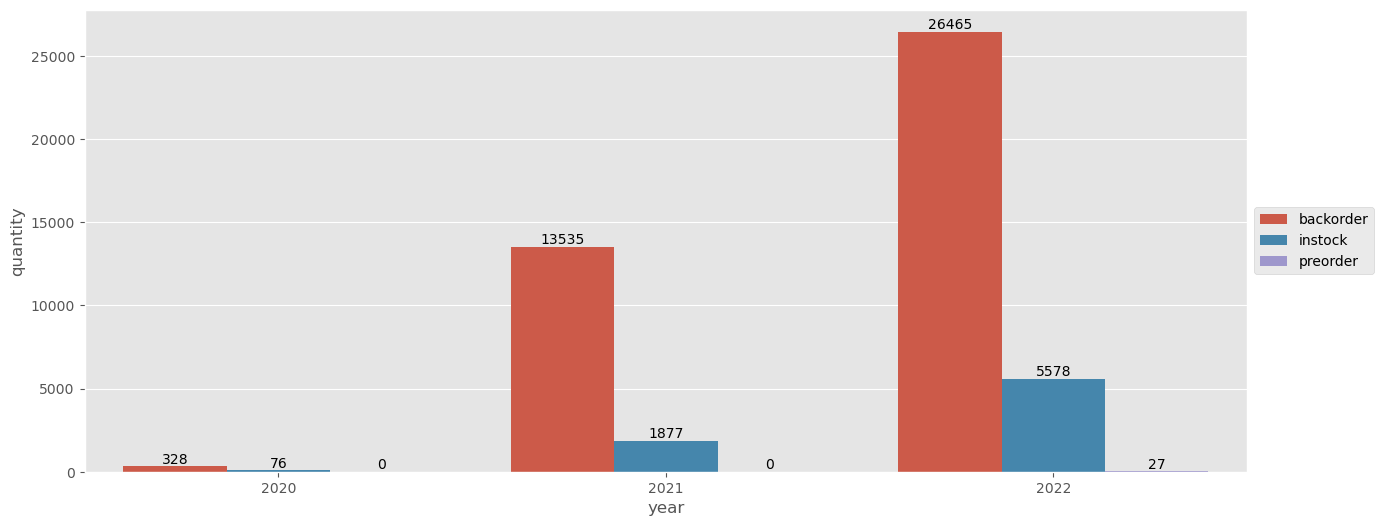

In [65]:
new_df = df[['day_ago_created', 'inventory_type']]
temp_df = pd.DataFrame({'year': new_df['day_ago_created'].apply(Year)})
new_df = pd.concat([temp_df, new_df], axis = 1)
new_df = new_df.loc[new_df['year'] != '2019']

bar_graph = new_df.groupby(['inventory_type'])['year'].value_counts().unstack(fill_value= 0).stack().reset_index()
bar_graph.columns = [*bar_graph.columns[:-1], 'quantity']

# line_graph

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(ax = ax, 
            data = line_graph, 
            x = 'year', 
            y = 'quantity', 
            hue = 'inventory_type')
for i in ax.containers:
    ax.bar_label(i,)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()